# Task 1: Predicting Insurance Claim Amounts 
## Objective: 
 #### Estimate the medical insurance claim amount based on personal data. 
## Dataset: 
 #### Medical Cost Personal Dataset 
## Instructions: 
#### ● Train a Linear Regression model to predict charges. 
#### ● Visualize how BMI, age, and smoking status impact insurance charges.
#### ● Evaluate model performance using MAE and RMSE. 
## Skills: 
#### ● Regression modeling  
#### ● Feature correlation and visualization 
#### ● Error evaluation using MAE and RMSE

# Here's The Python Code:

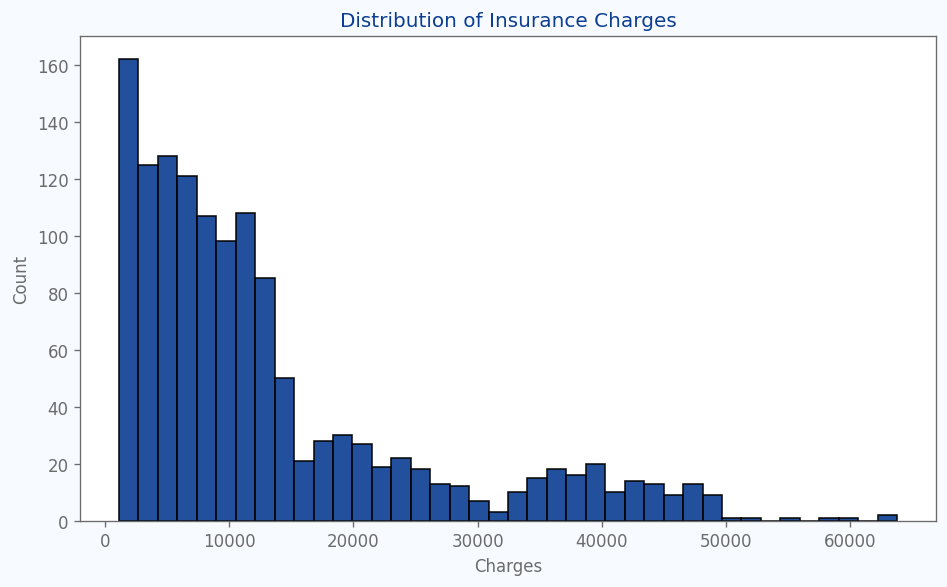

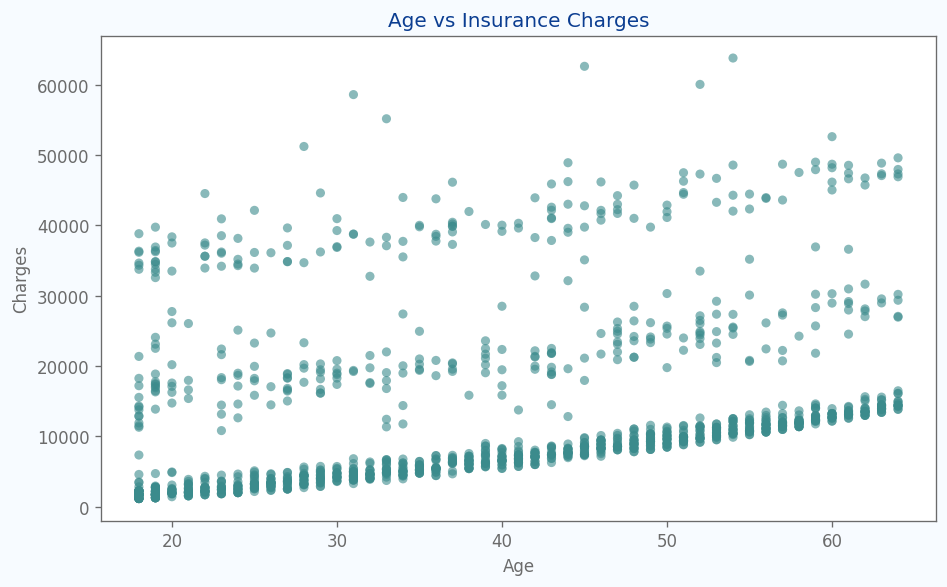

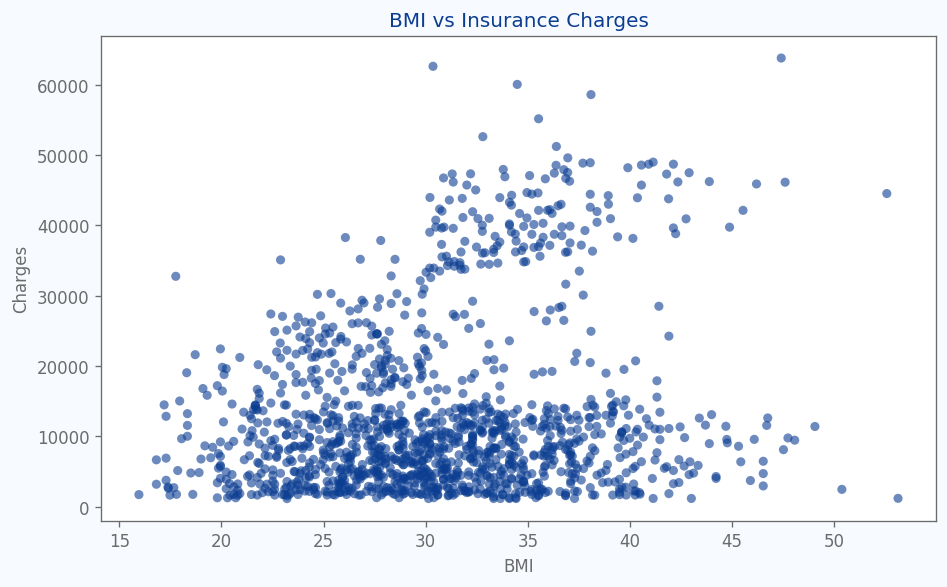

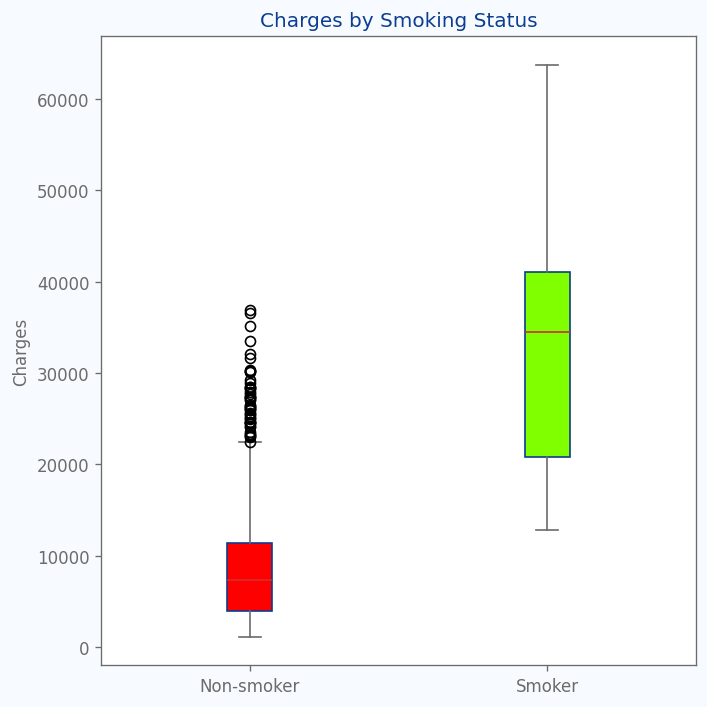

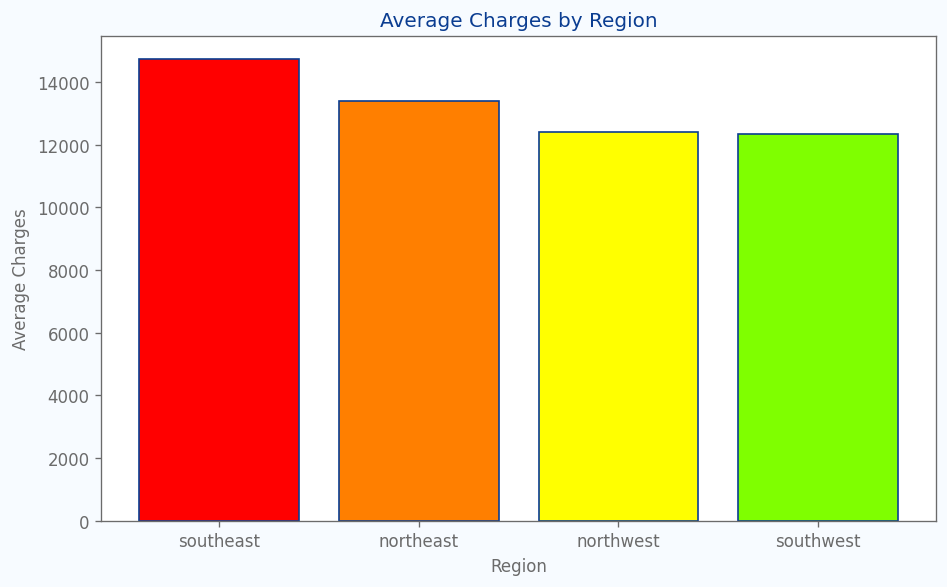

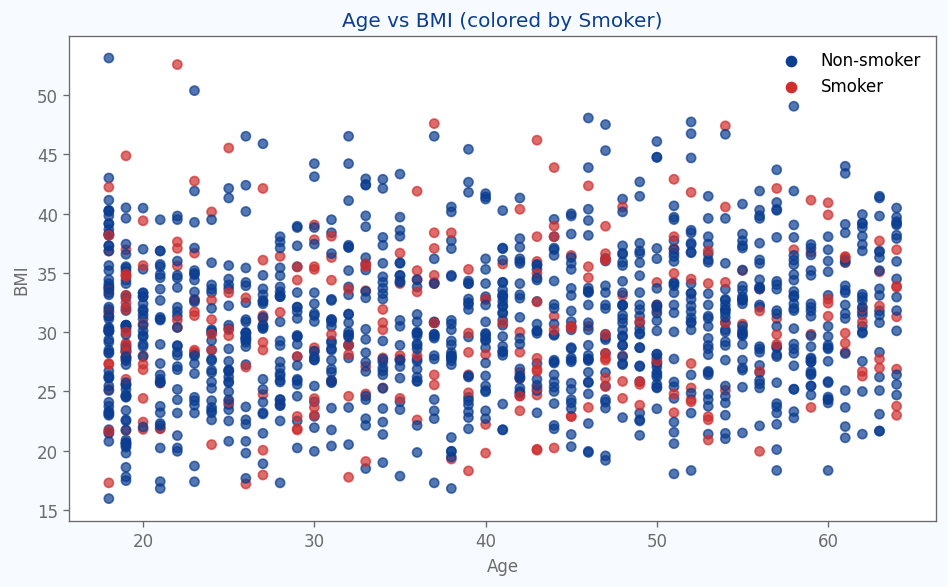

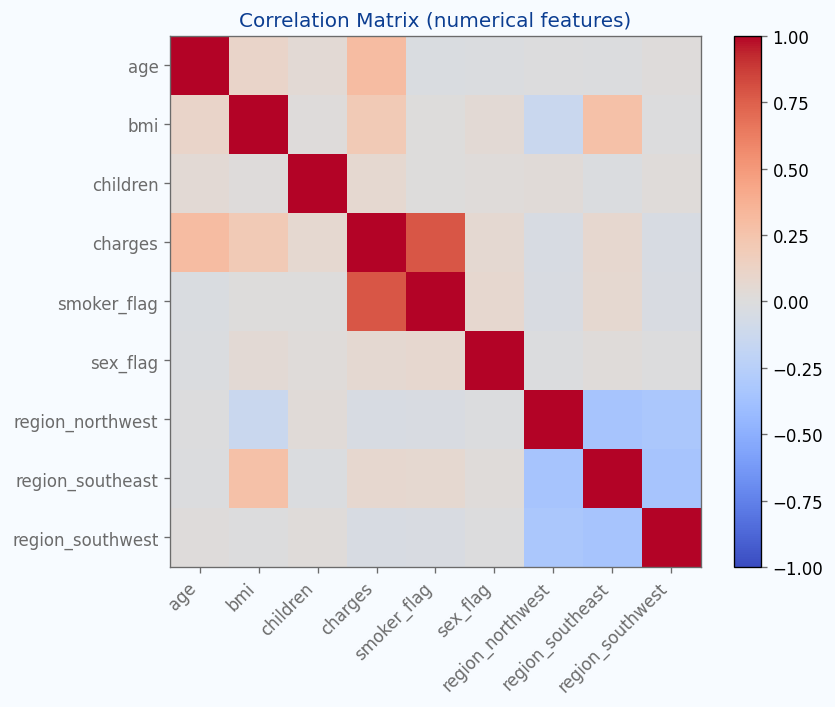

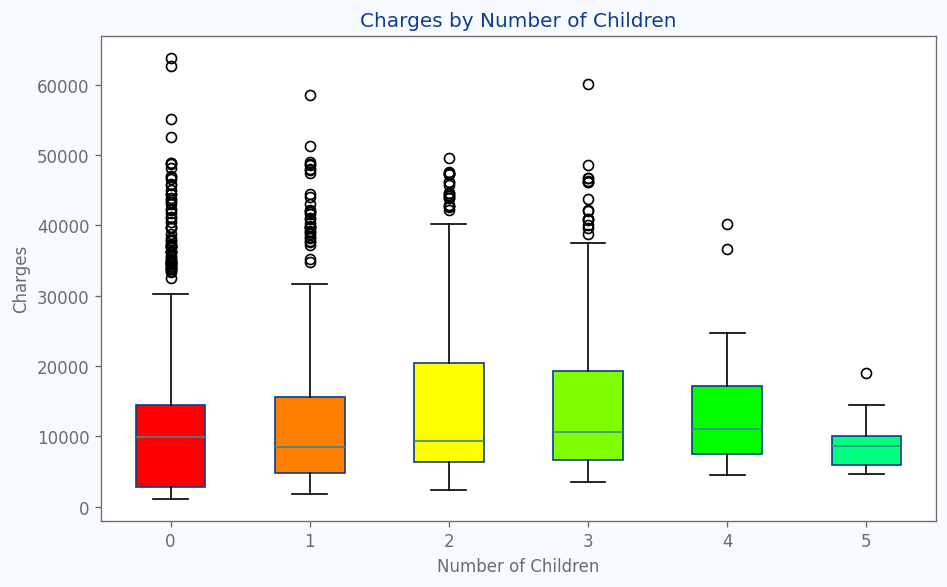

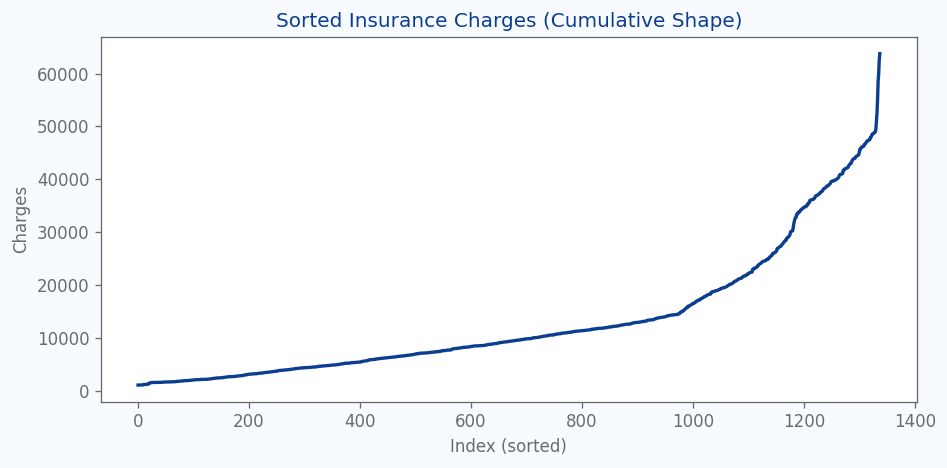

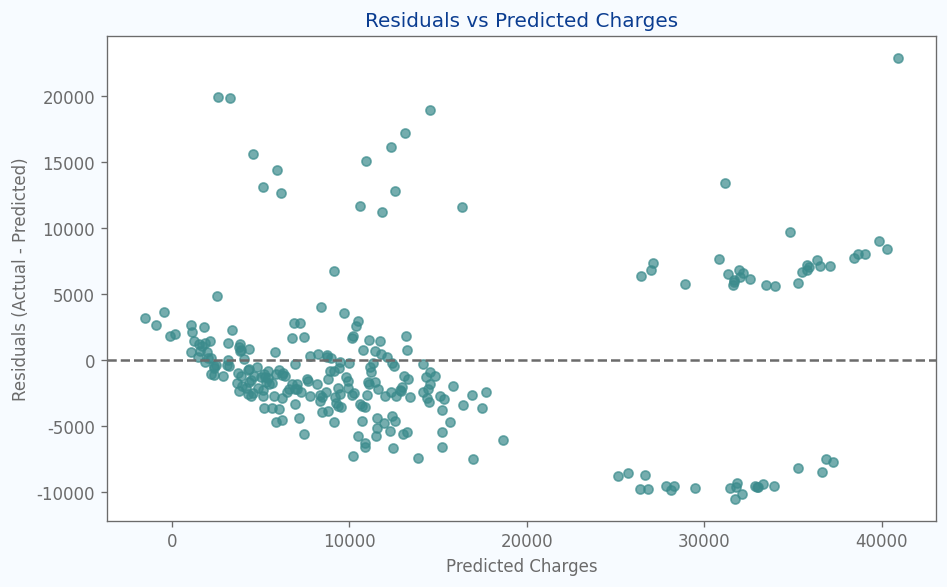

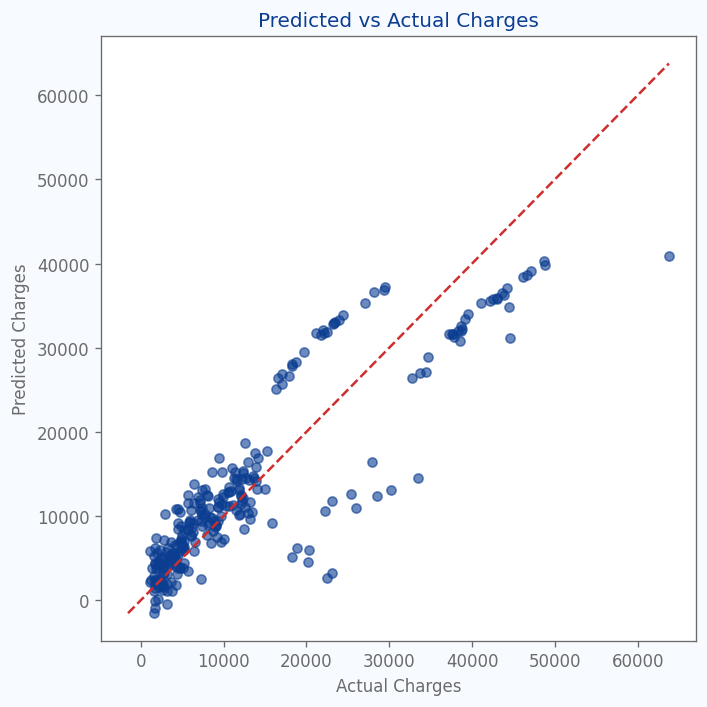

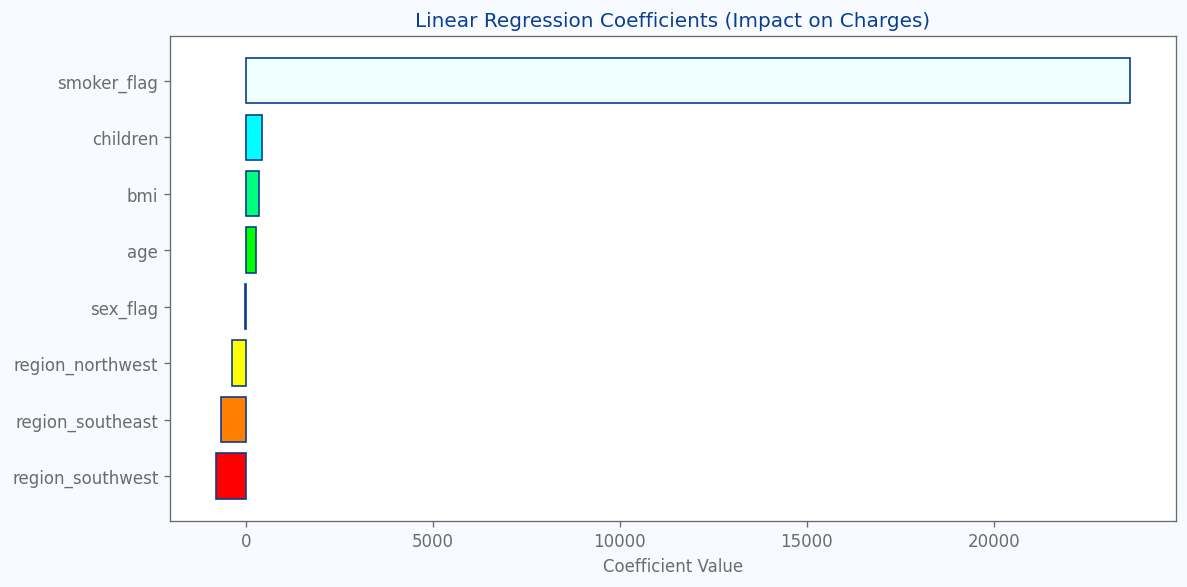

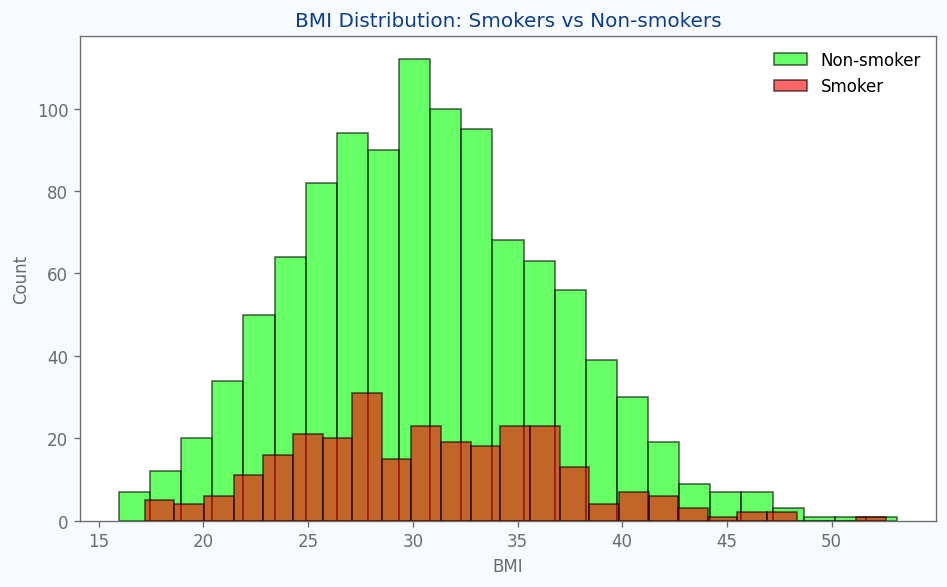

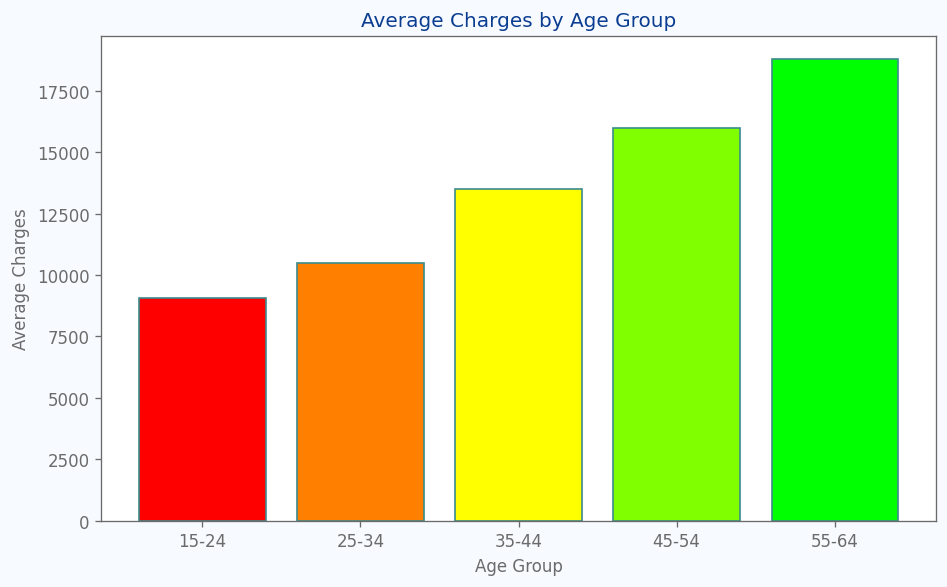

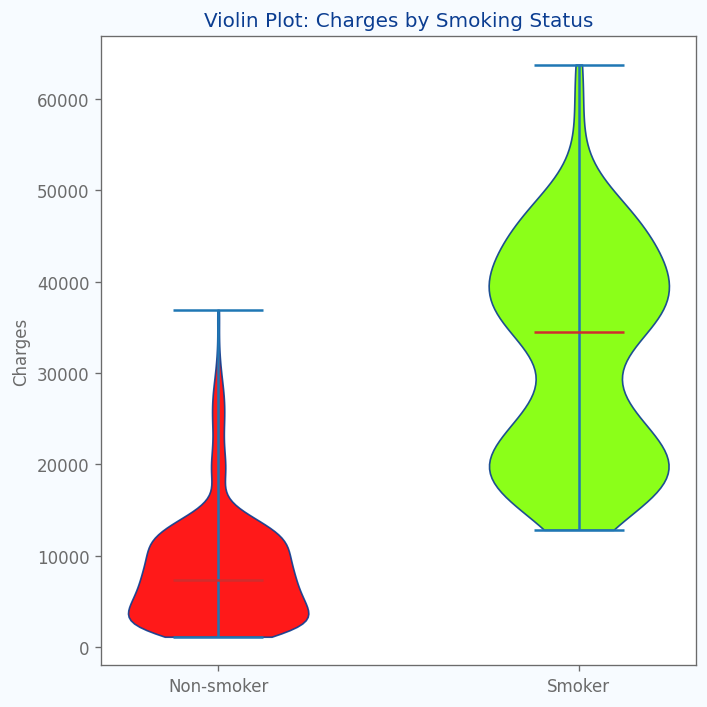


All 15 figures saved to: /mnt/data/figures_insurance_task
MAE: 4181.19, RMSE: 5796.28

Summary of Insurance Claim Analysis:
1. The distribution of insurance charges is right-skewed, with many low charges and few very high charges.
2. Age and BMI both positively correlate with insurance charges, showing higher costs for older and heavier individuals.
3. Smoking status is a major driver of cost, with smokers having significantly higher charges.
4. Regions show variation in average charges, indicating location-based risk or pricing differences.
5. Number of children impacts charges moderately, with distinct charge patterns observed for different family sizes.
6. The linear regression model explains key factors influencing charges, with coefficients revealing their impact direction and magnitude.
7. Model evaluation shows MAE: 4181.19 and RMSE: 5796.28, indicating the average prediction error magnitude.
8. Overall, the analysis highlights key demographic and lifestyle factors driving insu

In [1]:
"""    
Task 1:    
Predicting Insurance Claim Amounts 
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
import os

plt.rcParams['figure.dpi'] = 120

FIG_BG = "#f7fbff"
AX_BG = "#ffffff"
DARK = "#0b3d91"
ACCENT = "#3b8b8c"
WARN = "#cf2e2e"
MUTED = "#6b6b6b"

# Expanded vivid color palette
COLOR_PALETTE = [
    '#FF0000',       # red
    '#FF7F00',       # orange
    '#FFFF00',       # yellow
    '#7FFF00',       # chartreuse green
    '#00FF00',       # green
    '#00FF7F',       # spring green
    '#00FFFF',       # cyan
    '#F0FFFF',       # azure
    '#0000FF',       # blue
    '#8A2BE2',       # violet
    '#FF00FF',       # magenta
    '#FF007F'        # rose
]

SAVE_DIR = "/mnt/data/figures_insurance_task"
os.makedirs(SAVE_DIR, exist_ok=True)

DATA_PATH = "C:/Users/Abdullah Umer/Desktop/DevelopersHub Corporation Internship/TASK 1/Medical Cost Personal Insurance Dataset.csv"
df = pd.read_csv(DATA_PATH)

df_clean = df.copy()
df_clean['smoker_flag'] = df_clean['smoker'].map({'yes': 1, 'no': 0})
df_clean['sex_flag'] = df_clean['sex'].map({'male': 1, 'female': 0})
regions_ohe = pd.get_dummies(df_clean['region'], prefix='region', drop_first=True)
df_clean = pd.concat([df_clean.drop(columns=['region', 'sex', 'smoker']), regions_ohe], axis=1)

features = [c for c in df_clean.columns if c != 'charges']
X = df_clean[features].copy()
y = df_clean['charges'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

coef_df = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_
}).sort_values(by='coefficient', key=abs, ascending=False)

def currency(x, pos):
    if x >= 1e5:
        return f"{x/1e3:.0f}k"
    return f"{x:.0f}"

formatter = FuncFormatter(currency)

def setup_fig(figsize=(8,5)):
    fig = plt.figure(figsize=figsize, facecolor=FIG_BG)
    ax = fig.add_subplot(111, facecolor=AX_BG)
    for spine in ax.spines.values():
        spine.set_color(MUTED)
    ax.title.set_color(DARK)
    ax.xaxis.label.set_color(MUTED)
    ax.yaxis.label.set_color(MUTED)
    ax.tick_params(colors=MUTED)
    return fig, ax


# 1 - Histogram of Charges
fig, ax = setup_fig()
ax.hist(df['charges'], bins=40, edgecolor='black', color=DARK, alpha=0.9)
ax.set_title("Distribution of Insurance Charges")
ax.set_xlabel("Charges")
ax.set_ylabel("Count")
ax.yaxis.set_major_formatter(formatter)
ax.xaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "fig1_charges_histogram.png"))
plt.show()


# 2 - Age vs Charges Scatter
fig, ax = setup_fig()
ax.scatter(df['age'], df['charges'], alpha=0.6, s=30, color=ACCENT, edgecolors='none')
ax.set_title("Age vs Insurance Charges")
ax.set_xlabel("Age")
ax.set_ylabel("Charges")
ax.yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "fig2_age_vs_charges.png"))
plt.show()


# 3 - BMI vs Charges Scatter
fig, ax = setup_fig()
ax.scatter(df['bmi'], df['charges'], alpha=0.6, s=30, color=DARK, edgecolors='none')
ax.set_title("BMI vs Insurance Charges")
ax.set_xlabel("BMI")
ax.set_ylabel("Charges")
ax.yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "fig3_bmi_vs_charges.png"))
plt.show()


# 4 - Charges by Smoking Status Boxplot with vivid colors
fig, ax = setup_fig(figsize=(6,6))
groups = [df[df['smoker']=='no']['charges'], df[df['smoker']=='yes']['charges']]
box_colors = [COLOR_PALETTE[0], COLOR_PALETTE[3]]  # red and chartreuse green for two boxes
bp = ax.boxplot(groups, tick_labels=['Non-smoker', 'Smoker'], patch_artist=True,
                boxprops=dict(facecolor=box_colors[0], color=DARK),
                medianprops=dict(color=WARN),
                whiskerprops=dict(color=MUTED),
                capprops=dict(color=MUTED))

# Manually set the second box color
for patch, color in zip(bp['boxes'], box_colors):
    patch.set_facecolor(color)
ax.set_title("Charges by Smoking Status")
ax.set_ylabel("Charges")
ax.yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "fig4_boxplot_smoker.png"))
plt.show()


# 5 - Average Charges by Region Bar plot with different colors
avg_by_region = df.groupby('region')['charges'].mean().sort_values(ascending=False)
fig, ax = setup_fig(figsize=(8,5))
colors_region = COLOR_PALETTE[:len(avg_by_region)]
ax.bar(avg_by_region.index, avg_by_region.values, color=colors_region, edgecolor=DARK)
ax.set_title("Average Charges by Region")
ax.set_xlabel("Region")
ax.set_ylabel("Average Charges")
ax.yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "fig5_avg_charges_region.png"))
plt.show()


# 6 - Age vs BMI colored by smoker
fig, ax = setup_fig()
colors = df['smoker'].map({'yes': WARN, 'no': DARK})
ax.scatter(df['age'], df['bmi'], c=colors, alpha=0.7, s=30)
ax.set_title("Age vs BMI (colored by Smoker)")
ax.set_xlabel("Age")
ax.set_ylabel("BMI")
ax.scatter([], [], c=DARK, label='Non-smoker')
ax.scatter([], [], c=WARN, label='Smoker')
ax.legend(frameon=False)
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "fig6_age_vs_bmi_smoker.png"))
plt.show()


# 7 - Correlation Matrix Heatmap with color map 'coolwarm' (unchanged)
corr = df_clean.corr()
fig, ax = setup_fig(figsize=(8,6))
im = ax.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
ax.set_xticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha='right')
ax.set_yticks(range(len(corr.columns)))
ax.set_yticklabels(corr.columns)
ax.set_title("Correlation Matrix (numerical features)")
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.ax.yaxis.set_tick_params(color=MUTED)
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "fig7_corr_matrix.png"))
plt.show()


# 8 - Charges by Number of Children Boxplot with vivid colors
fig, ax = setup_fig(figsize=(8,5))
children_groups = [df[df['children']==i]['charges'] for i in sorted(df['children'].unique())]
children_colors = COLOR_PALETTE[:len(children_groups)]
bp = ax.boxplot(children_groups, tick_labels=sorted(df['children'].unique()), patch_artist=True,
                boxprops=dict(facecolor=AX_BG, color=DARK),
                medianprops=dict(color=ACCENT))

# Set different box colors for each children group
for patch, color in zip(bp['boxes'], children_colors):
    patch.set_facecolor(color)

ax.set_title("Charges by Number of Children")
ax.set_xlabel("Number of Children")
ax.set_ylabel("Charges")
ax.yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "fig8_charges_by_children.png"))
plt.show()


# 9 - Sorted Charges Plot
fig, ax = setup_fig(figsize=(8,4))
sorted_charges = np.sort(df['charges'].values)
ax.plot(sorted_charges, linewidth=2, color=DARK)
ax.set_title("Sorted Insurance Charges (Cumulative Shape)")
ax.set_xlabel("Index (sorted)")
ax.set_ylabel("Charges")
ax.yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "fig9_sorted_charges.png"))
plt.show()


# 10 - Residuals vs Predicted Charges Scatter
residuals = y_test - y_pred
fig, ax = setup_fig(figsize=(8,5))
ax.scatter(y_pred, residuals, alpha=0.7, s=30, color=ACCENT)
ax.axhline(0, linestyle='--', color=MUTED)
ax.set_title("Residuals vs Predicted Charges")
ax.set_xlabel("Predicted Charges")
ax.set_ylabel("Residuals (Actual - Predicted)")
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "fig10_residuals.png"))
plt.show()


# 11 - Predicted vs Actual Charges Scatter
fig, ax = setup_fig(figsize=(6,6))
ax.scatter(y_test, y_pred, alpha=0.6, s=30, color=DARK)
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
ax.plot(lims, lims, '--', color=WARN)
ax.set_title("Predicted vs Actual Charges")
ax.set_xlabel("Actual Charges")
ax.set_ylabel("Predicted Charges")
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "fig11_predicted_vs_actual.png"))
plt.show()


# 12 - Linear Regression Coefficients Horizontal Bar Plot with colors
fig, ax = setup_fig(figsize=(10,5))
coef_sorted = coef_df.set_index('feature')['coefficient'].sort_values()
colors_coef = COLOR_PALETTE * (len(coef_sorted) // len(COLOR_PALETTE) + 1)
ax.barh(coef_sorted.index, coef_sorted.values, color=colors_coef[:len(coef_sorted)], edgecolor=DARK)
ax.set_title("Linear Regression Coefficients (Impact on Charges)")
ax.set_xlabel("Coefficient Value")
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "fig12_coefficients.png"))
plt.show()


# 13 - BMI Distribution by Smoker Histograms with colors
fig, ax = setup_fig(figsize=(8,5))
ax.hist(df[df['smoker']=='no']['bmi'], bins=25, alpha=0.6, label='Non-smoker', edgecolor='black', color=COLOR_PALETTE[4])  # green
ax.hist(df[df['smoker']=='yes']['bmi'], bins=25, alpha=0.6, label='Smoker', edgecolor='black', color=COLOR_PALETTE[0])     # red
ax.set_title("BMI Distribution: Smokers vs Non-smokers")
ax.set_xlabel("BMI")
ax.set_ylabel("Count")
ax.legend(frameon=False)
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "fig13_bmi_smoker_hist.png"))
plt.show()


# 14 - Average Charges by Age Group Bar plot with vivid colors
age_bins = [15, 25, 35, 45, 55, 65]
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=['15-24','25-34','35-44','45-54','55-64'])
avg_by_agegrp = df.groupby('age_group', observed=False)['charges'].mean()
fig, ax = setup_fig(figsize=(8,5))
colors_agegrp = COLOR_PALETTE[:len(avg_by_agegrp)]
ax.bar(avg_by_agegrp.index.astype(str), avg_by_agegrp.values, color=colors_agegrp, edgecolor=ACCENT)
ax.set_title("Average Charges by Age Group")
ax.set_xlabel("Age Group")
ax.set_ylabel("Average Charges")
ax.yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "fig14_avg_charges_agegroup.png"))
plt.show()


# 15 - Violin plot for Charges by Smoking Status with colors
fig, ax = setup_fig(figsize=(6,6))
data_no = df[df['smoker']=='no']['charges'].values
data_yes = df[df['smoker']=='yes']['charges'].values
parts = ax.violinplot([data_no, data_yes], showmeans=False, showmedians=True)

for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(COLOR_PALETTE[i*3])  # pick distinct colors (0 and 3)
    pc.set_edgecolor(DARK)
    pc.set_alpha(0.9)

if 'cmedians' in parts:
    parts['cmedians'].set_color(WARN)

ax.set_xticks([1,2])
ax.set_xticklabels(['Non-smoker', 'Smoker'])
ax.set_title("Violin Plot: Charges by Smoking Status")
ax.set_ylabel("Charges")
ax.yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "fig15_violin_smoker_charges.png"))
plt.show()


print(f"\nAll 15 figures saved to: {SAVE_DIR}")
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

coef_df.to_csv('/mnt/data/linear_model_coefficients.csv', index=False)
pd.DataFrame({'MAE':[mae], 'RMSE':[rmse]}).to_csv('/mnt/data/model_evaluation.csv', index=False)


# --- Summary Section ---

print("\nSummary of Insurance Claim Analysis:")
print("1. The distribution of insurance charges is right-skewed, with many low charges and few very high charges.")
print("2. Age and BMI both positively correlate with insurance charges, showing higher costs for older and heavier individuals.")
print("3. Smoking status is a major driver of cost, with smokers having significantly higher charges.")
print("4. Regions show variation in average charges, indicating location-based risk or pricing differences.")
print("5. Number of children impacts charges moderately, with distinct charge patterns observed for different family sizes.")
print("6. The linear regression model explains key factors influencing charges, with coefficients revealing their impact direction and magnitude.")
print(f"7. Model evaluation shows MAE: {mae:.2f} and RMSE: {rmse:.2f}, indicating the average prediction error magnitude.")
print("8. Overall, the analysis highlights key demographic and lifestyle factors driving insurance costs, useful for targeted risk assessment and pricing.")












